<a href="https://colab.research.google.com/github/SanikaPanchabhai/19-ML-Practical/blob/main/ML_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')

# Show basic info about the data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None


In [ ]:
# preprocess data Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values for numerical columns with the median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Use mode()[0] to get the first mode value

# Convert categorical columns to numeric (using one-hot encoding)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df.drop(churn_column_name, axis=1)  # Features
y = df[churn_column_name]  # Target

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets. Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


 Model Selection and Training


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier (you can change this to other models like XGBoost or Logistic Regression)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

 Model Evaluation

In [ ]:
# Predict churn outcomes (binary)
y_pred = model.predict(X_test)

# Predict churn probabilities (for ROC curve)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Accuracy: 0.9967
Precision: 0.9999
Recall: 0.9931
F1-Score: 0.9965
ROC-AUC: 1.0000


confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[10133     1]
 [   63  9116]]


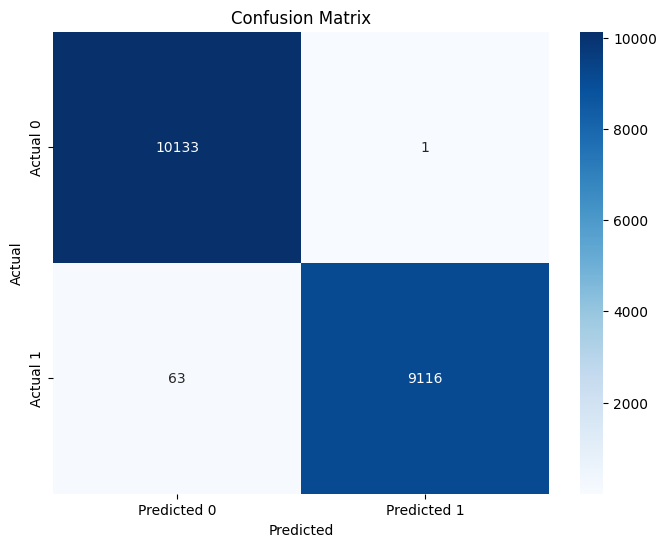

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10134
           1       1.00      0.99      1.00      9179

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313



ROC curve


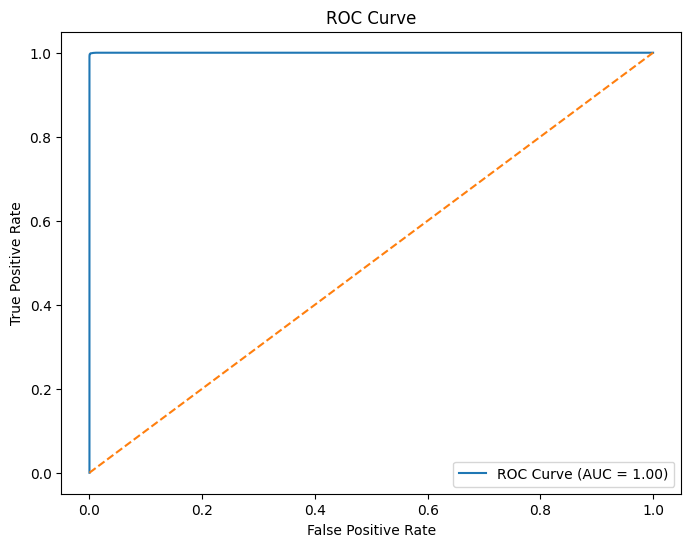

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the regressor
model_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
model_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Regression Model


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict probabilities
y_prob_pred = model_reg.predict(X_test)

# Evaluate regression metrics
mae = mean_absolute_error(y_test, y_prob_pred)
mse = mean_squared_error(y_test, y_prob_pred)
# Calculate RMSE manually if 'squared' is not available
rmse = mse**0.5  # Take the square root of MSE to get RMSE

# Print the metrics
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 0.0043
MSE: 0.0020
RMSE: 0.0448


In [ ]:
# Adjusting threshold (example: changing threshold from 0.5 to 0.3)
threshold = 0.3
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Evaluate adjusted metrics
print("\nAdjusted Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_adjusted):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_adjusted):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_adjusted):.4f}")



Adjusted Metrics:
Accuracy: 0.9975
Precision: 0.9961
Recall: 0.9987
